In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')
    
    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

# Define the date range and query
start_date = '2021-01-01'
end_date = '2023-12-30'
query = "Reliance Industries Limited"

# Convert start and end dates to datetime objects
start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Initialize an empty DataFrame to store all articles
all_articles = pd.DataFrame()

# Loop through each month in the date range
current_date = start_date_dt
while current_date < end_date_dt:
    # Define the next month's start date
    next_date = current_date + datetime.timedelta(days=30)
    
    # Format dates to strings
    start_str = current_date.strftime('%Y-%m-%d')
    end_str = next_date.strftime('%Y-%m-%d')
    
    # Scrape news for the current month
    month_articles = scrape_news(query, start_str, end_str)
    
    # Append month articles to the all_articles DataFrame
    all_articles = pd.concat([all_articles, month_articles], ignore_index=True)
    
    # Move to the next month
    current_date = next_date

# Save all articles to a CSV file
all_articles.to_csv('Reliance_Industries_Limited_news.csv', index=False)


C:\Users\mehta\AppData\Local\Temp\ipykernel_25748\1019470747.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
news_df = pd.read_csv('Reliance_Industries_Limited_news.csv')
news_df.head()
len(news_df)

2622

In [7]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df['cleaned_text'] = news_df['title'].apply(clean_text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
!pip install  yfinance
import yfinance as yf

RIL_stock = yf.download('RELIANCE.NS', start=start_date, end=end_date)
RIL_stock.reset_index(inplace=True)
RIL_stock.to_csv('Reliance_Industries_Limited_news.csv', index=False)


[*********************100%***********************]  1 of 1 completed

In [13]:
Stock_df = pd.read_csv('Reliance_Industries_Limited_news.csv')
Stock_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
1,2021-01-01,892.4838256835938,917.23095703125,921.6151733398438,914.6926879882812,917.461669921875,10015175
2,2021-01-04,893.9882202148438,918.7769775390625,922.4920043945312,908.231689453125,920.7383422851562,24513534
3,2021-01-05,882.8742065429688,907.3548583984375,915.4310913085938,902.6936645507812,908.6931762695312,24123091
4,2021-01-06,859.591064453125,883.4260864257812,907.3086547851562,879.2264404296875,907.2625122070312,46401468


In [ ]:
#useing naive bayes classifier 
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment)
news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date

Stock_df['Date'] = pd.to_datetime(Stock_df['Date']).dt.date

# Merge data on the date
merged_df = pd.merge(news_df, Stock_df, left_on='pub_date', right_on='Date', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("The merged DataFrame is empty. Please check the date ranges and formats.")
else:
    merged_df.to_csv('merged_data.csv', index=False)
    print(merged_df.head())


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.7 MB/s eta 0:00:00


                                               title  \
0  India's Reliance Industries and chairman fined...   
1  RPL case: Sebi fines Reliance Industries, Muke...   
2        Why did SEBI fine Mukesh Ambani? - Finshots   
3  Post fundraising, Reliance stock has lost some...   
4  SEBI Imposes Rs 40 Crore Fine On Reliance Indu...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMiqwFBV...  2021-01-01   
1  https://news.google.com/rss/articles/CBMi7gFBV...  2021-01-01   
2  https://news.google.com/rss/articles/CBMid0FVX...  2021-01-04   
3  https://news.google.com/rss/articles/CBMiuwFBV...  2021-01-18   
4  https://news.google.com/rss/articles/CBMitwFBV...  2021-01-01   

                                        cleaned_text  sentiment        Date  \
0  india reliance industries chairman fined share...   0.000000  2021-01-01   
1  rpl case sebi fines reliance industries mukesh...   0.000000  2021-01-01   
2                

In [15]:
Stock_df.sample(20)

,Date,Adj Close,Close,High,Low,Open,Volume
419,2022-09-09,1169.4189453125,1185.7315673828125,1204.5145263671875,1183.2855224609375,1204.5145263671875,8314850
373,2022-07-04,1091.4520263671875,1113.922119140625,1126.9825439453125,1091.9547119140625,1097.885009765625,41857728
389,2022-07-26,1094.97900390625,1117.5218505859375,1127.8594970703125,1112.837646484375,1117.3372802734375,11303288
63,2021-04-05,894.7739868164062,919.5845947265625,934.5371704101562,905.5088500976562,934.5140991210938,14875099
180,2021-09-23,1125.908935546875,1149.0885009765625,1152.3651123046875,1128.597900390625,1129.4747314453125,15748397
729,2023-12-12,1203.82568359375,1212.0250244140625,1232.4749755859375,1210.074951171875,1230.0,9197124
435,2022-10-03,1078.4798583984375,1093.52392578125,1115.4219970703125,1090.524169921875,1103.6768798828125,11852723
682,2023-10-03,1151.2337646484375,1159.074951171875,1167.800048828125,1158.0,1164.9749755859375,8859056
369,2022-06-28,1143.0015869140625,1166.5330810546875,1169.41748046875,1145.48876953125,1145.48876953125,13572847
569,2023-04-20,1067.8065185546875,1082.70166015625,1088.6781005859375,1076.2637939453125,1086.416748046875,7007330


In [16]:
merged_df.sample(4)

,title,link,pub_date,cleaned_text,sentiment,Date,Adj Close,Close,High,Low,Open,Volume
2052,"Reliance Industries, Tata Consultancy Services...",https://news.google.com/rss/articles/CBMijAJBV...,2023-11-24,reliance industries tata consultancy services ...,0.1750,2023-11-24,1188.8525390625,1196.949951171875,1201.300048828125,1195.5250244140625,1195.800048828125,6749486
1981,Reliance Retail Q2 Results: Profit Up 21% On R...,https://news.google.com/rss/articles/CBMimwFBV...,2023-10-27,reliance retail q2 results profit 21 record fo...,0.0000,2023-10-27,1125.2359619140625,1132.9000244140625,1136.75,1117.9749755859375,1120.0,11771084
1327,Mukesh Ambani's Reliance Retail to get a major...,https://news.google.com/rss/articles/CBMi6wFBV...,2023-03-15,mukesh ambani reliance retail get major boost ...,0.0625,2023-03-15,1018.1951293945312,1032.398193359375,1060.6650390625,1027.9447021484375,1054.11181640625,21728555
1413,Mukesh Ambani’s 66th birthday: Reliance boss’ ...,https://news.google.com/rss/articles/CBMi4gFBV...,2023-04-19,mukesh ambani 66th birthday reliance boss jour...,0.0000,2023-04-19,1070.5147705078125,1085.4476318359375,1088.17041015625,1076.3099365234375,1079.47119140625,12273475


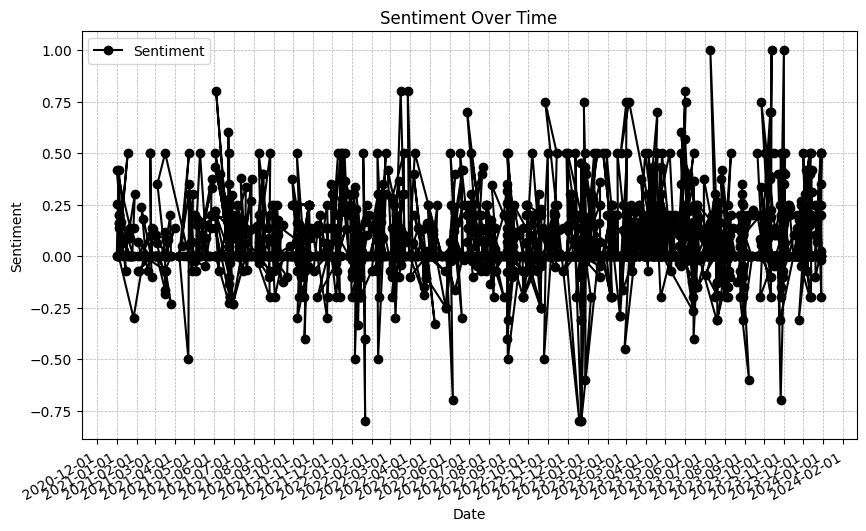

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure your 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['sentiment'], marker='o', linestyle='-', color='black', label='Sentiment')

# Set title and labels
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [18]:
# Calculate stock price movement
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)
    
    future_price = Stock_df[Stock_df['Date'] == future_date]['Close'].values
    if len(future_price) == 0:
        return None
    
    future_price = future_price[0]
    current_price = row['Close']
    
    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'

# Apply the function to the merged DataFrame
merged_df['price_movement'] = merged_df.apply(calculate_price_movement, axis=1)
merged_df.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df.to_csv('labeled_data.csv', index=False)

In [21]:
!pip install scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(merged_df['cleaned_text']).toarray()
# Add TF-IDF features to the DataFrame
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
merged_df

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 19.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 19.3 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


,title,link,pub_date,cleaned_text,sentiment,Date,Adj Close,Close,High,Low,...,wins,world,worth,year,years,york,youngest,yourstory,zee,ziz
0,Why did SEBI fine Mukesh Ambani? - Finshots,https://news.google.com/rss/articles/CBMid0FVX...,2021-01-04,sebi fine mukesh ambani finshots,0.416667,2021-01-04,893.9882202148438,918.7769775390625,922.4920043945312,908.231689453125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Post fundraising, Reliance stock has lost some...",https://news.google.com/rss/articles/CBMiuwFBV...,2021-01-18,post fundraising reliance stock lost lustre st...,0.000000,2021-01-18,890.8897094726562,915.5925903320312,921.6151733398438,887.625732421875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Energy sector hit by COVID-19, price stability...",https://news.google.com/rss/articles/CBMi4gFBV...,2021-01-27,energy sector hit covid 19 price stability cru...,0.000000,2021-01-27,850.9468383789062,874.5421752929688,888.38720703125,871.3117065429688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,No plans to buy agricultural land for corporat...,https://news.google.com/rss/articles/CBMi1AFBV...,2021-01-04,plans buy agricultural land corporate contract...,0.000000,2021-01-04,893.9882202148438,918.7769775390625,922.4920043945312,908.231689453125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reliance says no plans to enter contract farmi...,https://news.google.com/rss/articles/CBMirAFBV...,2021-01-04,reliance says plans enter contract farming com...,0.000000,2021-01-04,893.9882202148438,918.7769775390625,922.4920043945312,908.231689453125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Reliance signs non-binding pact with Walt Disn...,https://news.google.com/rss/articles/CBMi3AFBV...,2023-12-26,reliance signs non binding pact walt disney me...,0.000000,2023-12-26,1280.3048095703125,1289.0250244140625,1295.9749755859375,1281.3499755859375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,Ambani wants Reliance to emerge as pioneer AI ...,https://news.google.com/rss/articles/CBMipAFBV...,2023-12-28,ambani wants reliance emerge pioneer ai develo...,0.200000,2023-12-28,1293.9617919921875,1302.7750244140625,1306.0,1293.425048828125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,Reliance Family Day: Mukesh Ambani underlines ...,https://news.google.com/rss/articles/CBMi5wFBV...,2023-12-28,reliance family day mukesh ambani underlines v...,0.000000,2023-12-28,1293.9617919921875,1302.7750244140625,1306.0,1293.425048828125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,"Jio, IIT-B collaborate on 'Bharat GPT', Akash ...",https://news.google.com/rss/articles/CBMi6AFBV...,2023-12-27,jio iit b collaborate bharat gpt akash ambani ...,0.000000,2023-12-27,1284.675048828125,1293.425048828125,1299.949951171875,1286.550048828125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Feature Extraction: LDA (Topic Modeling)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda_model.fit_transform(tfidf_features)
# Add LDA features to the DataFrame
for i in range(lda_features.shape[1]):
    merged_df[f'topic_{i}'] = lda_features[:, i]
    # Save the final labeled and feature-enriched data
merged_df.to_csv('labeled_data_with_features.csv', index=False)

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load the labeled dataset with features
data = pd.read_csv('labeled_data_with_features.csv')

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

,encoded_movement,price_movement
0,0,decrease
1,1,increase
2,0,decrease
3,0,decrease
4,0,decrease
...,...,...
1568,1,increase
1569,0,decrease
1570,0,decrease
1571,1,increase


In [24]:
from sklearn.model_selection import train_test_split
# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.192, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = label_encoder.inverse_transform(y_pred_logreg)
y_pred_logreg = np.where(y_pred_logreg == 'increase', 1, 0)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       144
           1       0.59      0.12      0.20       159

    accuracy                           0.50       303
   macro avg       0.54      0.51      0.42       303
weighted avg       0.54      0.50      0.40       303

Accuracy: 0.49504950495049505


In [25]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))
# Train SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_svm = np.where(y_pred_svm == 'increase', 1, 0)

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()


Random Forest:
              precision    recall  f1-score   support

           0       0.49      0.86      0.62       144
           1       0.59      0.18      0.28       159

    accuracy                           0.50       303
   macro avg       0.54      0.52      0.45       303
weighted avg       0.54      0.50      0.44       303

Accuracy: 0.504950495049505

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.48      1.00      0.64       144
           1       0.00      0.00      0.00       159

    accuracy                           0.48       303
   macro avg       0.24      0.50      0.32       303
weighted avg       0.23      0.48      0.31       303

Accuracy: 0.4752475247524752


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    # Evaluate Logistic Regression
evaluate_model(y_test_binary, y_pred_logreg, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test_binary, y_pred_svm, "Support Vector Machine (SVM)")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       144
           1       0.59      0.12      0.20       159

    accuracy                           0.50       303
   macro avg       0.54      0.51      0.42       303
weighted avg       0.54      0.50      0.40       303

Accuracy: 0.49504950495049505
Confusion Matrix:
[[131  13]
 [140  19]]

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.48      1.00      0.64       144
           1       0.00      0.00      0.00       159

    accuracy                           0.48       303
   macro avg       0.24      0.50      0.32       303
weighted avg       0.23      0.48      0.31       303

Accuracy: 0.4752475247524752
Confusion Matrix:
[[144   0]
 [159   0]]



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba, model_name):
    """
    Plots the ROC curve for a given set of true labels and predicted probabilities.
    
    Parameters:
    y_true (array-like): True binary labels.
    y_pred_proba (array-like): Predicted probabilities for the positive class.
    model_name (str): Name of the model for labeling the plot.
    """
    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance')

    # Add labels and title
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve - {model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


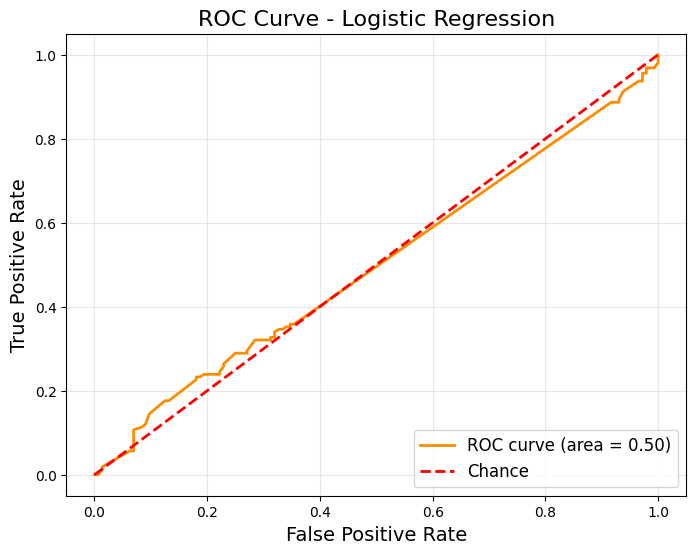

In [28]:
# Get probabilities for Logistic Regression (required for ROC curve)
y_pred_proba_logreg = logreg.predict_proba(X_test)
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_binary, y_pred_proba_logreg, "Logistic Regression")

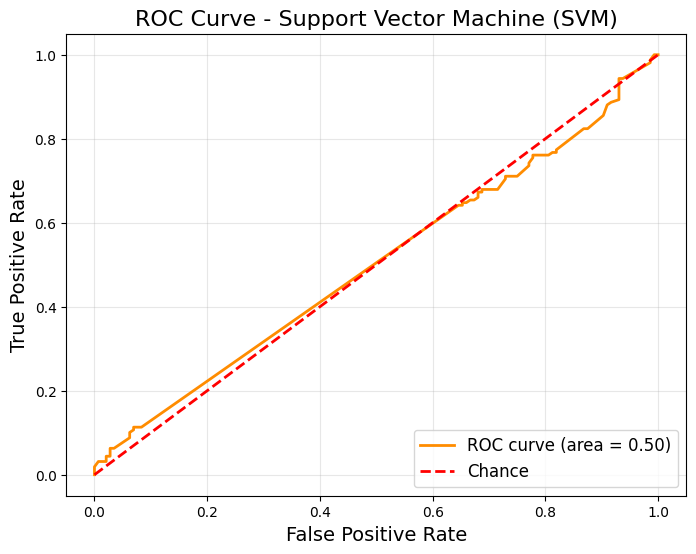

In [29]:
# Get probabilities for SVM (required for ROC curve)
y_pred_proba_svm = svm.predict_proba(X_test)
# Plot ROC curve for SVM
plot_roc_curve(y_test_binary, y_pred_proba_svm, "Support Vector Machine (SVM)")

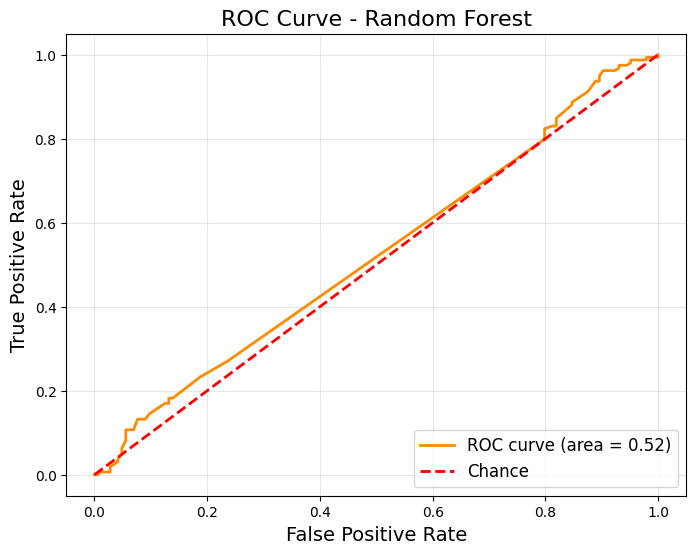

In [30]:
# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()


Epoch 1/12, Train Loss: 0.6907, Train Accuracy: 0.5366, Val Loss: 0.6962, Val Accuracy: 0.4762
Epoch 2/12, Train Loss: 0.6774, Train Accuracy: 0.5469, Val Loss: 0.6937, Val Accuracy: 0.4952
Epoch 3/12, Train Loss: 0.5924, Train Accuracy: 0.7321, Val Loss: 0.6665, Val Accuracy: 0.5714
Epoch 4/12, Train Loss: 0.4328, Train Accuracy: 0.8291, Val Loss: 0.7304, Val Accuracy: 0.6127
Epoch 5/12, Train Loss: 0.3386, Train Accuracy: 0.8625, Val Loss: 0.8410, Val Accuracy: 0.5905
Epoch 6/12, Train Loss: 0.2734, Train Accuracy: 0.8863, Val Loss: 0.9188, Val Accuracy: 0.5937
Epoch 7/12, Train Loss: 0.2041, Train Accuracy: 0.9269, Val Loss: 1.0167, Val Accuracy: 0.5937
Epoch 8/12, Train Loss: 0.1836, Train Accuracy: 0.9356, Val Loss: 1.1040, Val Accuracy: 0.5841
Epoch 9/12, Train Loss: 0.1247, Train Accuracy: 0.9650, Val Loss: 1.2198, Val Accuracy: 0.5873
Epoch 10/12, Train Loss: 0.1041, Train Accuracy: 0.9658, Val Loss: 1.3293, Val Accuracy: 0.5968
Epoch 11/12, Train Loss: 0.0806, Train Accuracy: 

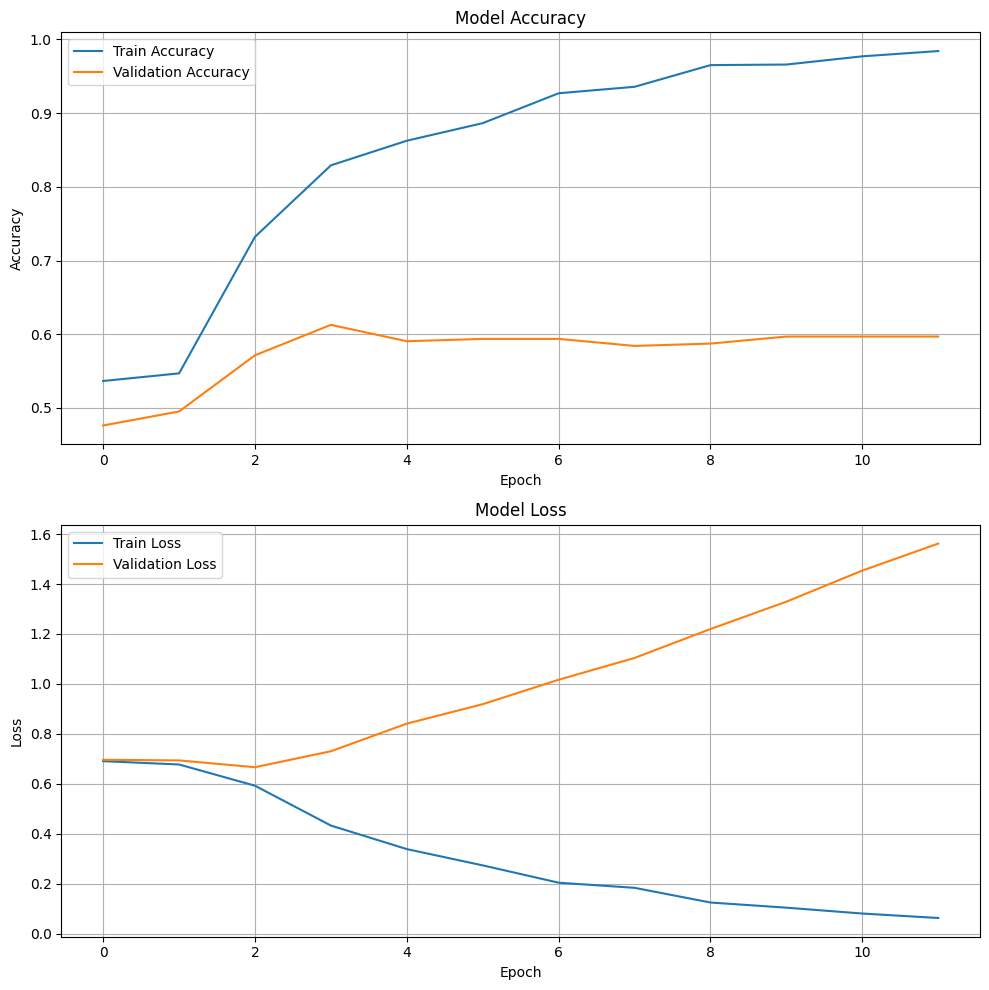

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Check if X_train_tfidf and X_test_tfidf are sparse matrices
if hasattr(X_train_tfidf, 'toarray'):
    X_train_tensor = torch.tensor(X_train_tfidf.toarray(), dtype=torch.float32)
else:
    X_train_tensor = torch.tensor(X_train_tfidf, dtype=torch.float32)

if hasattr(X_test_tfidf, 'toarray'):
    X_test_tensor = torch.tensor(X_test_tfidf.toarray(), dtype=torch.float32)
else:
    X_test_tensor = torch.tensor(X_test_tfidf, dtype=torch.float32)

# Convert labels to PyTorch tensors (without .values)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for labels
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = SimpleNN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with metric tracking
num_epochs = 12
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        train_correct += ((y_pred > 0.5).int() == y_batch).sum().item()
        train_total += y_batch.size(0)

    # Calculate average training loss and accuracy for the epoch
    avg_train_loss = train_loss / len(train_loader)
    avg_train_accuracy = train_correct / train_total

    # Validation loop
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            # Track validation loss and accuracy
            val_loss += loss.item()
            val_correct += ((y_pred > 0.5).int() == y_batch).sum().item()
            val_total += y_batch.size(0)

    # Calculate average validation loss and accuracy for the epoch
    avg_val_loss = val_loss / len(test_loader)
    avg_val_accuracy = val_correct / val_total

    # Store metrics
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_accuracy)
    val_accuracies.append(avg_val_accuracy)

    # Print metrics for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_accuracy:.4f}")

# Evaluation
model.eval()
y_pred_list = []
y_test_list = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred_binary = (y_pred > 0.5).int()  # Convert probabilities to binary predictions
        y_pred_list.extend(y_pred_binary.cpu().numpy())
        y_test_list.extend(y_batch.cpu().numpy())

# Flatten the lists
y_pred_binary = [item for sublist in y_pred_list for item in sublist]
y_test = [item for sublist in y_test_list for item in sublist]

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Plot training history
def plot_history(train_losses, val_losses, train_accuracies, val_accuracies):
    # Create subplots for accuracy and loss
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot training & validation accuracy values
    axs[0].plot(train_accuracies, label='Train Accuracy')
    axs[0].plot(val_accuracies, label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='upper left')
    axs[0].grid(True)

    # Plot training & validation loss values
    axs[1].plot(train_losses, label='Train Loss')
    axs[1].plot(val_losses, label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper left')
    axs[1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(train_losses, val_losses, train_accuracies, val_accuracies)

In [42]:
!pip install plotly
import pandas as pd
import plotly.graph_objects as go

def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()
    
    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

def plot_signals(stock_data, portfolio):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
    
    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=buy_signals['date'], 
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    fig.add_trace(go.Scatter(
        x=sell_signals['date'], 
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))

    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for MRF LIMITED',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

def simulate_trades(stock_data, trading_signals, capital):
    data = pd.read_csv('merged_data.csv')
    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity = 0
    
    for index, price in stock_data['Close'].items():
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital / price
                capital = capital % price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital': capital})
            elif signal == -1 and position == 1 and price > buy_price:  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price) * quantity
                capital = capital + quantity * sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price, 'capital': capital, 'profit': profit})

    return pd.DataFrame(portfolio)

def final(rate, initial):
    news_data = pd.read_csv('merged_data.csv')
    news_data_with_scores = news_data[['Date', 'sentiment']]
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)
    trading_signals = generate_trading_signals(sentiment_summary)
    
    print("\nSimulating trades...")
    portfolio = simulate_trades(news_data, trading_signals, initial)
    
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)
    print(portfolio)
    print(f"\nInitial capital: ${initial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio: {calculate_sharpe_ratio(portfolio, rate):.2f} with risk free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")
    plot_signals(news_data, portfolio)

final(0.02, 10000)


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 3.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/19.1 MB 4.2 MB/s eta 0:00:05
   ----- ---------------------------------- 2.6/19.1 MB 4.6 MB/s eta 0:00:04
   -------- ------------------------------- 3.9/19.1 MB 5.2 MB/s eta 0:00:03
   ----------- ---------------------------- 5.5/19.1 MB 5.7 MB/s eta 0:00:03
   --------------- ------------------------ 7.3/19.1 MB 6.2 MB/s eta 0:00:02
   ------------------- -------------------- 9.4/19.1 MB 6.8 MB/s eta 0:00:02
   ----------------------- ---------------- 11.3/19.1 MB 7.0 MB/s eta 0:00:02
   ---------------------------- ----------- 13.6/19.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 16.3/19.1 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  18.6/19.1 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 8.0 MB/s eta 0:00:00



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\etc'
Consider using the `--user` option or check the permissions.

